In [1]:
# coding: utf-8
import sys, os
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
from dataset.mnist import load_mnist
from ch03.two_layer_net import TwoLayerNet

import matplotlib.pyplot as plt


/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006/ch04
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006


In [2]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 신경망
# Input: 784, Hidden: 50, Output: 10
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [3]:
# 하이퍼 파라미터
iters_num = 70000 # 반복 횟수 설정
train_size = x_train.shape[0]
batch_size = 150
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size/ batch_size, 1)

In [4]:
for i in range(iters_num):

    # 미니 배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    # 선택된 데이터(batch_mask)의 데이터와 레이블(정담)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    ## 손실함수 기준으로 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개 변수 갱신
    ## 기울기 계산을 바탕으로 매개변수 경신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    # 현재 미니 배치에서의 손실값, 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

0 train acc, test acc | 0.09751666666666667, 0.0974
400 train acc, test acc | 0.7348166666666667, 0.7434
800 train acc, test acc | 0.8490666666666666, 0.8527
1200 train acc, test acc | 0.8835166666666666, 0.8871
1600 train acc, test acc | 0.8962166666666667, 0.8984
2000 train acc, test acc | 0.9031833333333333, 0.9067
2400 train acc, test acc | 0.9087666666666666, 0.9103
2800 train acc, test acc | 0.9123333333333333, 0.915
3200 train acc, test acc | 0.9151666666666667, 0.9173
3600 train acc, test acc | 0.91885, 0.9213
4000 train acc, test acc | 0.92155, 0.9233
4400 train acc, test acc | 0.9235, 0.9262
4800 train acc, test acc | 0.9262166666666667, 0.9278
5200 train acc, test acc | 0.9286, 0.9303
5600 train acc, test acc | 0.9303166666666667, 0.9315
6000 train acc, test acc | 0.9333666666666667, 0.9341
6400 train acc, test acc | 0.9348666666666666, 0.9352
6800 train acc, test acc | 0.9366, 0.9366
7200 train acc, test acc | 0.93785, 0.9382
7600 train acc, test acc | 0.9397333333333333, 0

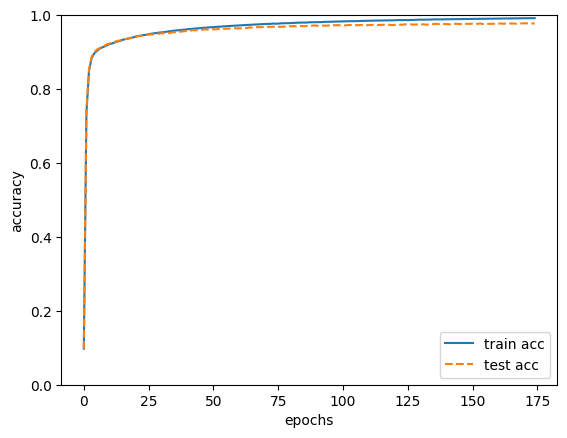

In [5]:
# 그래프 그리기
markers = {'train':'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label = 'test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()